In [36]:
import pandas as pd
import numpy as np

## Wczytanie danych

In [37]:
df = pd.read_csv("file203848872b50.csv")

In [38]:
X = df.drop("Compressive_Strength_Mpa", axis=1)
y = df['Compressive_Strength_Mpa']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Podział na zbiór treningowy i testowy

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Jako czarne skrzynki wybieram xgboosta i randomForest.

In [42]:
xgb = XGBRegressor(n_estimators=1000, max_depth=100, learning_rate=1)
rf = RandomForestRegressor(n_estimators=1000, max_depth=3)
lr = LinearRegression()

## Uczenie modeli 

In [43]:
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Wyniki modeli na zbiorze uczącym

In [44]:
mean_squared_error(y_test, lr.predict(X_test))

9.299046924558562

In [45]:
mean_squared_error(y_test, xgb.predict(X_test))

17.351458993882495

In [46]:
mean_squared_error(y_test, rf.predict(X_test))

13.968463844788545

Lepiej wypada błąd lasu losowego więc to ten model będę analizował dalej.

Przekształcam zmienną `cemment`

In [47]:
from pdpbox import pdp
import matplotlib.pyplot as plt
import ruptures as rpt
import pdpbox
pdp_iso = pdp.pdp_isolate(rf, X_train.join(y_train), X_train.columns, 'Cemment', num_grid_points=100)
algo = rpt.Pelt(model="rbf").fit(pdp_iso.pdp)
result = algo.predict(pen=3)

In [48]:
algo = rpt.Pelt(model="rbf").fit(pdp_iso.pdp)
result = algo.predict(pen=3)

In [49]:
import matplotlib.pyplot as plt

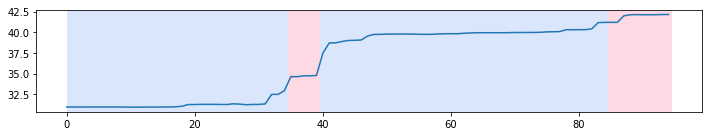

In [50]:
rpt.display(pdp_iso.pdp, result)
plt.show()

In [51]:
split_points = result
crosses = [pdp_iso.feature_grids[ress] for ress in result[:-1]]

In [52]:
crosses

[162.17171717171718, 166.0606060606061, 321.32323232323233]

## Tworzenie nowych cech

In [53]:
df['new_feature'] = np.where(df['Cemment'] < 166, 0, np.where(df['Cemment'] < 321, 1, 2))

In [54]:
df = df.join(pd.get_dummies(df['new_feature'], prefix="new_cemment", drop_first=True))

In [55]:
X = df.drop(["Compressive_Strength_Mpa", "new_feature", "Cemment"], axis=1)
y = df['Compressive_Strength_Mpa']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [57]:
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Wyniki modelu po przekształceniu zmiennej

In [60]:
mean_squared_error(y_test, rf.predict(X_test))

27.15046712065775

In [61]:
mean_squared_error(y_test, lr.predict(X_test))

6.783364999784297

O ile model Lasu Losowego działał gorzej bo zmianie zmiennej, to przekształcenie takie pomogło modeli regresjii liniowej.